In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [9]:
# Create sample data
num_samples_class = 1000
positive_samples = 4 * np.random.randn(num_samples_class) + 4
negative_samples = 2 * np.random.randn(num_samples_class) - 8
x = np.concatenate((negative_samples, positive_samples), axis=0)
y = np.zeros(num_samples_class*2)
y[num_samples_class:] = 1
y_onehot = np.zeros((num_samples_class*2, 2))
y_onehot[:num_samples_class, 0] = 1
y_onehot[num_samples_class:, 1] = 1

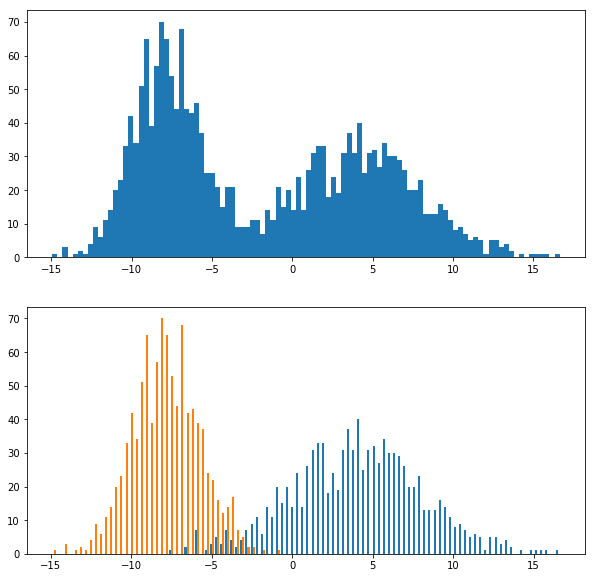

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
res = plt.hist(x, bins=100)
plt.subplot(2,1,2)
res = plt.hist([positive_samples, negative_samples], bins=100)

In [11]:
x = np.atleast_2d(x).T
print(x.shape)
print(y_onehot.shape)
print(y.shape)

(2000, 1)
(2000, 2)
(2000,)


In [19]:
# Create logistic regression model
w_init = np.random.randn(1)
print('Initial weight value = {}'.format(w_init[0]))
w = tf.Variable(w_init, dtype=tf.float32)
b = tf.Variable(1.0)
weighted_x = w * x + b
y_prob_pos = tf.nn.sigmoid(weighted_x)
y_prob_neg = 1 - y_prob_pos
y_prob = tf.concat([y_prob_neg, y_prob_pos], 1)

Initial weight value = -0.9175394857665731


In [20]:
# Loss: MSE
loss = tf.nn.l2_loss(y_prob - y_onehot)
# Logistic accuracy
correct_prediction = tf.equal(tf.arg_max(y_prob, 1), tf.arg_max(y_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.0001)
train = optimizer.minimize(loss)

In [22]:
# Main loop
accuracy_vals = []
loss_vals = []
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    init_vals = session.run([loss, w, b])
    print('Initial values: loss={}  w={}  b={}'.format(*init_vals))
    
    for step in range(150):
        print('Step {}'.format(step))
        vals = session.run([train, loss, accuracy, w, b])
        loss_val, accuracy_val = vals[1:3]
        accuracy_vals.append(accuracy_val)
        loss_vals.append(loss_val)
        print('loss={}  accuracy={}  w={}  b={}'.format(*vals[1:]))
        print()

Initial values: loss=1668.0936279296875  w=[-0.91753948]  b=1.0
Step 0
loss=1668.0936279296875  accuracy=0.11150000244379044  w=[-0.89482242]  b=1.0087300539016724

Step 1
loss=1662.0087890625  accuracy=0.11299999803304672  w=[-0.87074345]  b=1.0176887512207031

Step 2
loss=1655.2130126953125  accuracy=0.11500000208616257  w=[-0.84510338]  b=1.0269001722335815

Step 3
loss=1647.548583984375  accuracy=0.1185000017285347  w=[-0.81765491]  b=1.0363929271697998

Step 4
loss=1638.811767578125  accuracy=0.12150000035762787  w=[-0.788086]  b=1.046201229095459

Step 5
loss=1628.723388671875  accuracy=0.12399999797344208  w=[-0.75599504]  b=1.056366205215454

Step 6
loss=1616.890380859375  accuracy=0.12700000405311584  w=[-0.72085387]  b=1.0669379234313965

Step 7
loss=1602.752685546875  accuracy=0.13050000369548798  w=[-0.68194872]  b=1.0779775381088257

Step 8
loss=1585.463134765625  accuracy=0.13600000739097595  w=[-0.63828444]  b=1.0895600318908691

Step 9
loss=1563.702392578125  accuracy=0

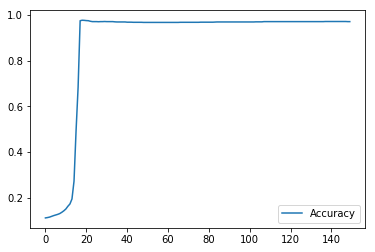

In [25]:
plt.plot(accuracy_vals, label='Accuracy')
plt.legend()
plt.show()

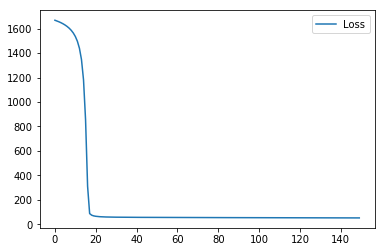

In [24]:
plt.plot(loss_vals, label='Loss')
plt.legend()
plt.show()